# Imports

In [1]:
# Dependencies
import pandas as pd
pd.set_option('display.max_columns', None)
import requests
import json
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

# Gather Data

In [2]:
df = pd.read_csv("../Resources/clean_data.csv", low_memory=False)
df.head()

,incidentnum,servyr,servnumid,watch,signal,offincident,incident_address,ra,beat,division,sector,district,date1,year1,month1,day1,time1,date1dayofyear,date2_of_occurrence_2,year2,month2,day2,time2,date2dayofyear,reporteddate,edate,eyear,emonth,eday,etime,edatedayofyear,cfs_number,callorgdate,callreceived,callcleared,calldispatched,involvement,victimtype,compname,comprace,compethnicity,compsex,compage,compageatoffensetime,comphaddress,comphzipcode,compcity,compstate,ro1badge,ro1name,ro2badge,ro2name,reptoff,assoffbadge,reviewbadgenum,elenum,followup1,followup2,status,ucr_disp,offensecode,cjis,penalcode,nibrs_crime,nibrs_crime_category,nibrs_crimeagainst,nibrs_code,nibrs_group,nibrs_type,upzdate,x_coordinate,y_cordinate,zip_code,city,state,geocoded_column,apt,taag,community,comphapt,victimcond,premise,objattack,mo,family,hatecrimedescriptn,drug,weaponused,gang,victiminjurydesc,compbusname,compbaddress,hate,compbphone,splrpt,latitude,longitude,hour
0,009968-2020,2020,009968-2020-01,3,6X - MAJOR DIST (VIOLENCE),ASSAULT -BODILY INJURY ONLY,1515 E ELMORE AVE,4223.0,722.0,SouthCentral,720.0,D4,2020-01-15 00:00:00,2020,January,Wed,2021-03-22 17:58:00,15,2020-01-15 00:00:00,2020.0,January,Wed,2021-03-22 18:02:00,15.0,2020-01-15 18:04:00,2020-01-15 18:57:00,2020,January,Wed,2021-03-22 18:57:00,15,20-0096809,2020-01-15 18:04:00,2020-01-15 18:04:00,2020-01-15 20:55:45,2020-01-15 18:27:08,Victim,Individual,"GREEN, SHERRIE",Black,Non-Hispanic or Latino,Female,58.0,58.0,1515 E ELMORE AVE,75216,DALLAS,TX,11548,"CARDWELL,NAKISHA,LANIECE",9893,"ROBINSON,SAMMIE,TORNEAL",11548,8977,057074,C717,Investigations,Capers / Assaults,Clear by Arrest,CBA (Over Age 17),MA-13990001-H1,13990001,PC 22.01(a)(1),SIMPLE ASSAULT,ASSAULT OFFENSES,PERSON,13B,A,Coded,2020-07-13 23:12:51.0000000,2.490527e+06,6.948112e+06,75216.0,DALLAS,TX,"{'latitude': '32.71698', 'longitude': '-96.802...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.716980,-96.802527,17
1,013444-2020,2020,013444-2020-01,2,40/01 - OTHER,UNEXPLAINED DEATH (NO OFFENSE),8550 MIDPARK RD,1022.0,644.0,NorthCentral,640.0,D11,2020-01-20 00:00:00,2020,January,Mon,2021-03-22 05:00:00,20,2020-01-20 00:00:00,2020.0,January,Mon,2021-03-22 22:07:00,20.0,2020-01-21 01:56:00,2020-01-20 23:12:00,2020,January,Mon,2021-03-22 23:12:00,20,20-0130300,2020-01-20 22:07:46,2020-01-20 22:07:45,2020-01-21 03:02:20,2020-01-20 22:15:25,Victim,Individual,"WILLIAMS, JOHNNY, LEE",Black,Non-Hispanic or Latino,Male,61.0,61.0,8550 MIDPARK RD,75240,DALLAS,TX,11674,"KRAUSE,JAKE,LEVI",9168,"BENNERS,KIRK,EDWARD",11674,7687,111210,E654,Investigations,Capers / Homicide,Closed/Cleared,Closed,NA-99999999-MSC10,99999999,No Offense,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2020-03-17 11:04:37.0000000,2.503112e+06,7.027873e+06,75240.0,DALLAS,TX,"{'latitude': '32.936496', 'longitude': '-96.75...",1014,Coit Springvalley,KitMaham_PFA,1014,Deceased,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.936496,-96.757271,5
2,018769-2020,2020,018769-2020-01,2,09 - THEFT,THEFT OF PROP <$100 - OTHER THAN SHOPLIFT,1342 S MARSALIS AVE,4170.0,713.0,SouthCentral,710.0,D4,2020-01-27 00:00:00,2020,January,Mon,2021-03-22 15:30:00,27,2020-01-27 00:00:00,2020.0,January,Mon,2021-03-22 15:38:00,27.0,2020-01-28 18:42:00,2020-01-28 17:10:00,2020,January,Tue,2021-03-22 17:10:00,28,20-0180602,2020-01-28 16:38:34,2020-01-28 16:38:33,2020-01-28 17:23:10,2020-01-28 16:45:44,Victim,Individual,"EJEZIE, GABRIEL",Black,Non-Hispanic or Latino,Male,35.0,35.0,1342 S MARSALIS AVE,75216,DALLAS,TX,11068,"DUGAS,TOREY,JAY",11107,"BELL,ROBERT,ASHLEE",11068,6715,118185,C758,Investigations,Property Crime Division / SC Property Crimes,Suspended,Suspended,MC-99999999-F151,99999999,PC 31.03(f),ALL OTHER LARCENY,LARCENY/ THEFT OFFENSES,PROPERTY,23H,A,Coded,2020-07-10 18:50:31.0000000,2.486897e+06,6.953264e+06,75216.0,DALLAS,TX,"{'latitude': '32.731606', 'longitude': '-96.81...",NaN,NaN,Vermont Village_PFA,NaN,NaN,Single Family Resid

# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130513 entries, 0 to 130512
Data columns (total 98 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   incidentnum            130513 non-null  object 
 1   servyr                 130513 non-null  int64  
 2   servnumid              130513 non-null  object 
 3   watch                  130513 non-null  int64  
 4   signal                 114654 non-null  object 
 5   offincident            130513 non-null  object 
 6   incident_address       130513 non-null  object 
 7   ra                     130513 non-null  float64
 8   beat                   130513 non-null  float64
 9   division               130513 non-null  object 
 10  sector                 130513 non-null  float64
 11  district               130513 non-null  object 
 12  date1                  130513 non-null  object 
 13  year1                  130513 non-null  int64  
 14  month1                 130513 non-nu

In [4]:
df['zip_code'] = df['zip_code'].astype(str)

# Data Clean

In [5]:
# drop columns with no effect
df_sub = df.loc[:, ["watch", "ra", "beat", "division", "sector", "district", "month1", "day1", "status", "nibrs_crime_category", "hour", "latitude", "longitude"]]
df_sub.head()

,watch,ra,beat,division,sector,district,month1,day1,status,nibrs_crime_category,hour,latitude,longitude
0,3,4223.0,722.0,SouthCentral,720.0,D4,January,Wed,Clear by Arrest,ASSAULT OFFENSES,17,32.716980,-96.802527
1,2,1022.0,644.0,NorthCentral,640.0,D11,January,Mon,Closed/Cleared,MISCELLANEOUS,5,32.936496,-96.757271
2,2,4170.0,713.0,SouthCentral,710.0,D4,January,Mon,Suspended,LARCENY/ THEFT OFFENSES,15,32.731606,-96.814328
3,1,2016.0,154.0,Central,150.0,D14,January,Wed,Closed/Cleared,MISCELLANEOUS,3,32.801089,-96.789959
4,3,2203.0,337.0,SouthEast,330.0,D5,January,Wed,Clear by Arrest,PUBLIC INTOXICATION,16,32.734110,-96.672961


In [6]:
# drop not significant crime categories
df_crime_cat = df_sub[(df_sub.nibrs_crime_category != 'ANIMAL OFFENSES') 
                & (df_sub.nibrs_crime_category != 'ARSON') 
                & (df_sub.nibrs_crime_category != 'BRIBERY')
                & (df_sub.nibrs_crime_category != 'COUNTERFEITING / FORGERY')
                & (df_sub.nibrs_crime_category != 'DISORDERLY CONDUCT')
                & (df_sub.nibrs_crime_category != 'DRIVING UNDER THE INFLUENCE')
                & (df_sub.nibrs_crime_category != 'EMBEZZELMENT')
                & (df_sub.nibrs_crime_category != 'EXTORTION/ BLACKMAIL')
                & (df_sub.nibrs_crime_category != 'FAMILY OFFENSES, NONVIOLENT')
                & (df_sub.nibrs_crime_category != 'FRAUD OFFENSES')
                & (df_sub.nibrs_crime_category != 'GAMBLING OFFENSES')
                & (df_sub.nibrs_crime_category != 'HOMICIDE OFFENSES')
                & (df_sub.nibrs_crime_category != 'HUMAN TRAFFICKING')
                & (df_sub.nibrs_crime_category != 'KIDNAPPING/ ABDUCTION')
                & (df_sub.nibrs_crime_category != 'LIQUOR LAW VIOLATIONS')
                & (df_sub.nibrs_crime_category != 'PEEPING TOM')
                & (df_sub.nibrs_crime_category != 'PORNOGRAPHY/ OBSCENE MATERIAL')
                & (df_sub.nibrs_crime_category != 'STOLEN PROPERTY OFFENSES')
                & (df_sub.nibrs_crime_category != 'TRAFFIC VIOLATION - NON HAZARDOUS')
                & (df_sub.nibrs_crime_category != 'TRESPASS OF REAL PROPERTY')
                & (df_sub.nibrs_crime_category != 'WEAPON LAW VIOLATIONS')
               ]

In [7]:
# drop na from lat and long
df_crime_cat.dropna(subset=['latitude'], how="all", inplace=True)

<ipython-input-7-02f686b4856b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_cat.dropna(subset=['latitude'], how="all", inplace=True)


In [8]:
df_crime_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118028 entries, 0 to 130511
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   watch                 118028 non-null  int64  
 1   ra                    118028 non-null  float64
 2   beat                  118028 non-null  float64
 3   division              118028 non-null  object 
 4   sector                118028 non-null  float64
 5   district              118028 non-null  object 
 6   month1                118028 non-null  object 
 7   day1                  118028 non-null  object 
 8   status                118028 non-null  object 
 9   nibrs_crime_category  118028 non-null  object 
 10  hour                  118028 non-null  int64  
 11  latitude              118028 non-null  float64
 12  longitude             118028 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 12.6+ MB


In [9]:
df_crime_cat.groupby("nibrs_crime_category").size() 

nibrs_crime_category
ALL OTHER OFFENSES                             4437
ASSAULT OFFENSES                              10469
BURGLARY/ BREAKING & ENTERING                  7771
DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY    10168
DRUG/ NARCOTIC VIOLATIONS                      4915
LARCENY/ THEFT OFFENSES                       26483
MISCELLANEOUS                                 33741
MOTOR VEHICLE THEFT                            9754
PUBLIC INTOXICATION                            3195
ROBBERY                                        3772
TRAFFIC VIOLATION - HAZARDOUS                  3323
dtype: int64

In [10]:
df_crime_cat.groupby("division").latitude.mean()

division
Central         32.795254
NorthCentral    32.951221
NorthEast       32.866526
NorthWest       32.851355
SouthCentral    32.688674
SouthEast       32.745195
SouthWest       32.730503
Name: latitude, dtype: float64

In [11]:
df_crime_cat.to_csv("../Resources/datatable.csv", index=False)

In [12]:
df_crime_cat.describe()

,watch,ra,beat,sector,hour,latitude,longitude
count,118028.000000,118028.000000,118028.000000,118028.000000,118028.000000,118028.000000,118028.000000
mean,2.000568,3169.253813,413.175357,409.252720,12.663927,32.801777,-96.789197
std,0.829061,1839.433109,197.752749,197.814572,7.038233,0.085810,0.069605
min,1.000000,1001.000000,111.000000,110.000000,0.000000,32.621953,-96.977929
25%,1.000000,1253.000000,235.000000,230.000000,7.000000,32.738912,-96.839941
50%,2.000000,3066.000000,417.000000,410.000000,14.000000,32.794919,-96.794644
75%,3.000000,4321.000000,552.000000,550.000000,19.000000,32.864221,-96.749688
max,3.000000,9611.000000,757.000000,750.000000,23.000000,33.015190,-96.559084


In [13]:
obj_cols = [x for x in df_crime_cat.columns if type(df_sub[x][0])==str]
obj_cols

['division', 'district', 'month1', 'day1', 'status', 'nibrs_crime_category']

In [14]:
for x in obj_cols:
    print(x)
    print(df_crime_cat[x].nunique())
    print()

division
7

district
14

month1
12

day1
7

status
3

nibrs_crime_category
11



In [15]:
df_crime_cat.head()

,watch,ra,beat,division,sector,district,month1,day1,status,nibrs_crime_category,hour,latitude,longitude
0,3,4223.0,722.0,SouthCentral,720.0,D4,January,Wed,Clear by Arrest,ASSAULT OFFENSES,17,32.716980,-96.802527
1,2,1022.0,644.0,NorthCentral,640.0,D11,January,Mon,Closed/Cleared,MISCELLANEOUS,5,32.936496,-96.757271
2,2,4170.0,713.0,SouthCentral,710.0,D4,January,Mon,Suspended,LARCENY/ THEFT OFFENSES,15,32.731606,-96.814328
3,1,2016.0,154.0,Central,150.0,D14,January,Wed,Closed/Cleared,MISCELLANEOUS,3,32.801089,-96.789959
4,3,2203.0,337.0,SouthEast,330.0,D5,January,Wed,Clear by Arrest,PUBLIC INTOXICATION,16,32.734110,-96.672961


In [16]:
df_crime_cat.groupby("status").size()

status
Clear by Arrest    17796
Closed/Cleared      3929
Suspended          96303
dtype: int64

### label-encode target status

In [17]:
target_labels = []

# LABEL ENCODE
for indx, row in df_crime_cat.iterrows():
    if row["status"] ==  "Clear by Arrest":
        target_labels.append(0)
    elif row["status"] ==  "Closed/Cleared":
        target_labels.append(1)
    else:
        target_labels.append(2)

df_crime_cat["status_target"] = target_labels

<ipython-input-17-c9d5973f797f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_cat["status_target"] = target_labels


In [18]:
month_labels = []

# LABEL ENCODE MONTH
for indx, row in df_crime_cat.iterrows():
    if row["month1"] ==  "January":
        month_labels.append(0)
    elif row["month1"] ==  "February":
        month_labels.append(1)
    elif row["month1"] ==  "March":
        month_labels.append(2)
    elif row["month1"] ==  "April":
        month_labels.append(3)
    elif row["month1"] ==  "May":
        month_labels.append(4)
    elif row["month1"] ==  "June":
        month_labels.append(5)
    elif row["month1"] ==  "July":
        month_labels.append(6)
    elif row["month1"] ==  "August":
        month_labels.append(7)
    elif row["month1"] ==  "September":
        month_labels.append(8)
    elif row["month1"] ==  "October":
        month_labels.append(9)
    elif row["month1"] ==  "November":
        month_labels.append(10)
    else:
        month_labels.append(11)

df_crime_cat["month"] = month_labels

<ipython-input-18-faf36f79ec19>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_cat["month"] = month_labels


In [19]:
df_sub = df_crime_cat.drop("status", axis=1)

In [20]:
df_sub = df_crime_cat.drop("month1", axis=1)

In [21]:
obj_cols_to_dum = ['division', 'district', 'day1', 'nibrs_crime_category']

#get dummies
dums_linear = pd.get_dummies(df_sub.loc[:, obj_cols_to_dum], drop_first=True)
dums_other = pd.get_dummies(df_sub.loc[:, obj_cols_to_dum], drop_first=False)

#concat
df_sub_linear = pd.concat([df_sub, dums_linear], axis=1)
df_sub_other = pd.concat([df_sub, dums_other], axis=1)

#drop the original categorical columns and add dummies
df_sub_linear = df_sub_linear.drop(obj_cols_to_dum, axis = 1)
df_sub_other = df_sub_other.drop(obj_cols_to_dum, axis = 1)

df_sub_linear.head()

,watch,ra,beat,sector,status,hour,latitude,longitude,status_target,month,division_NorthCentral,division_NorthEast,division_NorthWest,division_SouthCentral,division_SouthEast,division_SouthWest,district_D10,district_D11,district_D12,district_D13,district_D14,district_D2,district_D3,district_D4,district_D5,district_D6,district_D7,district_D8,district_D9,day1_Mon,day1_Sat,day1_Sun,day1_Thu,day1_Tue,day1_Wed,nibrs_crime_category_ASSAULT OFFENSES,nibrs_crime_category_BURGLARY/ BREAKING & ENTERING,nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS,nibrs_crime_category_LARCENY/ THEFT OFFENSES,nibrs_crime_category_MISCELLANEOUS,nibrs_crime_category_MOTOR VEHICLE THEFT,nibrs_crime_category_PUBLIC INTOXICATION,nibrs_crime_category_ROBBERY,nibrs_crime_category_TRAFFIC VIOLATION - HAZARDOUS
0,3,4223.0,722.0,720.0,Clear by Arrest,17,32.716980,-96.802527,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,2,1022.0,644.0,640.0,Closed/Cleared,5,32.936496,-96.757271,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,4170.0,713.0,710.0,Suspended,15,32.731606,-96.814328,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,2016.0,154.0,150.0,Closed/Cleared,3,32.801089,-96.789959,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,3,2203.0,337.0,330.0,Clear by Arrest,16,32.734110,-96.672961,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [22]:
df_sub_other.head()

,watch,ra,beat,sector,status,hour,latitude,longitude,status_target,month,division_Central,division_NorthCentral,division_NorthEast,division_NorthWest,division_SouthCentral,division_SouthEast,division_SouthWest,district_D1,district_D10,district_D11,district_D12,district_D13,district_D14,district_D2,district_D3,district_D4,district_D5,district_D6,district_D7,district_D8,district_D9,day1_Fri,day1_Mon,day1_Sat,day1_Sun,day1_Thu,day1_Tue,day1_Wed,nibrs_crime_category_ALL OTHER OFFENSES,nibrs_crime_category_ASSAULT OFFENSES,nibrs_crime_category_BURGLARY/ BREAKING & ENTERING,nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS,nibrs_crime_category_LARCENY/ THEFT OFFENSES,nibrs_crime_category_MISCELLANEOUS,nibrs_crime_category_MOTOR VEHICLE THEFT,nibrs_crime_category_PUBLIC INTOXICATION,nibrs_crime_category_ROBBERY,nibrs_crime_category_TRAFFIC VIOLATION - HAZARDOUS
0,3,4223.0,722.0,720.0,Clear by Arrest,17,32.716980,-96.802527,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,2,1022.0,644.0,640.0,Closed/Cleared,5,32.936496,-96.757271,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,4170.0,713.0,710.0,Suspended,15,32.731606,-96.814328,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,2016.0,154.0,150.0,Closed/Cleared,3,32.801089,-96.789959,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,3,2203.0,337.0,330.0,Clear by Arrest,16,32.734110,-96.672961,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


# Correlations

### Linear Correlations

In [23]:
target_corrs_linear = df_sub_linear.corr()["status_target"]

quality_cols_linear = []

#loop and check corrs
for x in range(len(target_corrs_linear)):
    if (abs(target_corrs_linear[x]) > 0.01):
        print(target_corrs_linear.index[x], target_corrs_linear[x])
        quality_cols_linear.append(target_corrs_linear.index[x])

watch -0.0742756461631988
hour 0.011179023669867049
latitude 0.02503927035242115
status_target 1.0
division_NorthCentral 0.03477636757633326
division_NorthEast 0.01675503190115016
division_SouthCentral -0.01184900042673208
division_SouthEast -0.02769631147363194
division_SouthWest 0.012565289023720871
district_D11 0.024678475729153108
district_D12 0.023454597671280476
district_D2 -0.01644394043222173
district_D4 -0.024220676527913935
district_D7 -0.024980122067897882
district_D8 0.01125250339789275
district_D9 0.010550747932948093
day1_Sat -0.016194399978904726
day1_Sun -0.025687238980824707
day1_Tue 0.016359715681341654
day1_Wed 0.011965824388474135
nibrs_crime_category_ASSAULT OFFENSES -0.03479879425302949
nibrs_crime_category_BURGLARY/ BREAKING & ENTERING 0.0947923488902529
nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY 0.08923247167940052
nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS -0.32784959002171327
nibrs_crime_category_LARCENY/ THEFT OFFENSES 0.1857036584543

In [24]:
full_linear_cols = []

for col in quality_cols_linear:
    if "_" not in col:
        full_linear_cols.append(col)
    else:
        cleanCol = col.split("_")[0]
        for col2 in df_sub_linear.columns:
            if (cleanCol in col2) and (col2 not in full_linear_cols):
                full_linear_cols.append(col2)
                
# final training set
df_sub_linear_final = df_sub_linear.loc[:, full_linear_cols]

df_sub_linear_final.head()

,watch,hour,latitude,status,status_target,division_NorthCentral,division_NorthEast,division_NorthWest,division_SouthCentral,division_SouthEast,division_SouthWest,district_D10,district_D11,district_D12,district_D13,district_D14,district_D2,district_D3,district_D4,district_D5,district_D6,district_D7,district_D8,district_D9,day1_Mon,day1_Sat,day1_Sun,day1_Thu,day1_Tue,day1_Wed,nibrs_crime_category_ASSAULT OFFENSES,nibrs_crime_category_BURGLARY/ BREAKING & ENTERING,nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS,nibrs_crime_category_LARCENY/ THEFT OFFENSES,nibrs_crime_category_MISCELLANEOUS,nibrs_crime_category_MOTOR VEHICLE THEFT,nibrs_crime_category_PUBLIC INTOXICATION,nibrs_crime_category_ROBBERY,nibrs_crime_category_TRAFFIC VIOLATION - HAZARDOUS
0,3,17,32.716980,Clear by Arrest,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,2,5,32.936496,Closed/Cleared,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,15,32.731606,Suspended,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,3,32.801089,Closed/Cleared,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,3,16,32.734110,Clear by Arrest,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [25]:
quality_cols_linear

['watch',
 'hour',
 'latitude',
 'status_target',
 'division_NorthCentral',
 'division_NorthEast',
 'division_SouthCentral',
 'division_SouthEast',
 'division_SouthWest',
 'district_D11',
 'district_D12',
 'district_D2',
 'district_D4',
 'district_D7',
 'district_D8',
 'district_D9',
 'day1_Sat',
 'day1_Sun',
 'day1_Tue',
 'day1_Wed',
 'nibrs_crime_category_ASSAULT OFFENSES',
 'nibrs_crime_category_BURGLARY/ BREAKING & ENTERING',
 'nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY',
 'nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS',
 'nibrs_crime_category_LARCENY/ THEFT OFFENSES',
 'nibrs_crime_category_MOTOR VEHICLE THEFT',
 'nibrs_crime_category_PUBLIC INTOXICATION',
 'nibrs_crime_category_ROBBERY',
 'nibrs_crime_category_TRAFFIC VIOLATION - HAZARDOUS']

In [26]:
df_sub_linear_final.to_csv("../Resources/df_sub_linear_final.csv", index=False)

### Tree-Based Correlations

In [27]:
target_corrs_other = df_sub_other.corr()["status_target"]

quality_cols_other = []

#loop and check corrs
for x in range(len(target_corrs_other)):
    if (abs(target_corrs_other[x]) > 0.01):
        print(target_corrs_other.index[x], target_corrs_other[x])
        quality_cols_other.append(target_corrs_other.index[x])

watch -0.0742756461631988
hour 0.011179023669867049
latitude 0.02503927035242115
status_target 1.0
division_Central -0.013972231114648105
division_NorthCentral 0.03477636757633326
division_NorthEast 0.01675503190115016
division_SouthCentral -0.01184900042673208
division_SouthEast -0.02769631147363194
division_SouthWest 0.012565289023720871
district_D11 0.024678475729153108
district_D12 0.023454597671280476
district_D2 -0.01644394043222173
district_D4 -0.024220676527913935
district_D7 -0.024980122067897882
district_D8 0.01125250339789275
district_D9 0.010550747932948093
day1_Sat -0.016194399978904726
day1_Sun -0.025687238980824707
day1_Tue 0.016359715681341654
day1_Wed 0.011965824388474135
nibrs_crime_category_ALL OTHER OFFENSES -0.11056600761098664
nibrs_crime_category_ASSAULT OFFENSES -0.03479879425302949
nibrs_crime_category_BURGLARY/ BREAKING & ENTERING 0.0947923488902529
nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY 0.08923247167940052
nibrs_crime_category_DRUG/ N

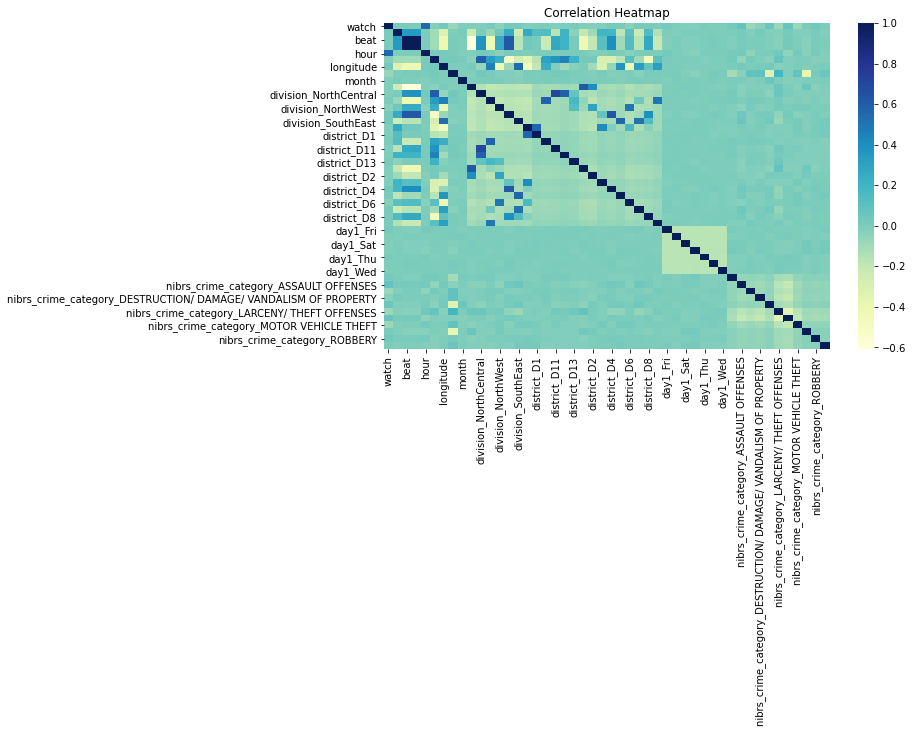

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sub_other.corr(), cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
full_other_cols = []

for col in quality_cols_other:
    if "_" not in col:
        full_other_cols.append(col)
    else:
        cleanCol = col.split("_")[0]
        for col2 in df_sub_other.columns:
            if (cleanCol in col2) and (col2 not in full_other_cols):
                full_other_cols.append(col2)
                
# final training set
df_sub_other_final = df_sub_other.loc[:, full_other_cols]

df_sub_other_final.head()

,watch,hour,latitude,status,status_target,division_Central,division_NorthCentral,division_NorthEast,division_NorthWest,division_SouthCentral,division_SouthEast,division_SouthWest,district_D1,district_D10,district_D11,district_D12,district_D13,district_D14,district_D2,district_D3,district_D4,district_D5,district_D6,district_D7,district_D8,district_D9,day1_Fri,day1_Mon,day1_Sat,day1_Sun,day1_Thu,day1_Tue,day1_Wed,nibrs_crime_category_ALL OTHER OFFENSES,nibrs_crime_category_ASSAULT OFFENSES,nibrs_crime_category_BURGLARY/ BREAKING & ENTERING,nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS,nibrs_crime_category_LARCENY/ THEFT OFFENSES,nibrs_crime_category_MISCELLANEOUS,nibrs_crime_category_MOTOR VEHICLE THEFT,nibrs_crime_category_PUBLIC INTOXICATION,nibrs_crime_category_ROBBERY,nibrs_crime_category_TRAFFIC VIOLATION - HAZARDOUS
0,3,17,32.716980,Clear by Arrest,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,2,5,32.936496,Closed/Cleared,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,15,32.731606,Suspended,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,3,32.801089,Closed/Cleared,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,3,16,32.734110,Clear by Arrest,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [30]:
df_sub_other_final.to_csv("../Resources/df_sub_other_final.csv", index=False)

In [31]:
df_template = df_sub_other_final.iloc[0:1]
df_template = df_template.drop(["status", "status_target"], axis=1)
df_template

,watch,hour,latitude,division_Central,division_NorthCentral,division_NorthEast,division_NorthWest,division_SouthCentral,division_SouthEast,division_SouthWest,district_D1,district_D10,district_D11,district_D12,district_D13,district_D14,district_D2,district_D3,district_D4,district_D5,district_D6,district_D7,district_D8,district_D9,day1_Fri,day1_Mon,day1_Sat,day1_Sun,day1_Thu,day1_Tue,day1_Wed,nibrs_crime_category_ALL OTHER OFFENSES,nibrs_crime_category_ASSAULT OFFENSES,nibrs_crime_category_BURGLARY/ BREAKING & ENTERING,nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS,nibrs_crime_category_LARCENY/ THEFT OFFENSES,nibrs_crime_category_MISCELLANEOUS,nibrs_crime_category_MOTOR VEHICLE THEFT,nibrs_crime_category_PUBLIC INTOXICATION,nibrs_crime_category_ROBBERY,nibrs_crime_category_TRAFFIC VIOLATION - HAZARDOUS
0,3,17,32.71698,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [32]:
df_template.to_csv("../Resources/template.csv", index=False)

In [33]:
len(df_template.columns)

42

In [34]:
sam = pd.read_csv("../Resources/template.csv")
sam.head()

,watch,hour,latitude,division_Central,division_NorthCentral,division_NorthEast,division_NorthWest,division_SouthCentral,division_SouthEast,division_SouthWest,district_D1,district_D10,district_D11,district_D12,district_D13,district_D14,district_D2,district_D3,district_D4,district_D5,district_D6,district_D7,district_D8,district_D9,day1_Fri,day1_Mon,day1_Sat,day1_Sun,day1_Thu,day1_Tue,day1_Wed,nibrs_crime_category_ALL OTHER OFFENSES,nibrs_crime_category_ASSAULT OFFENSES,nibrs_crime_category_BURGLARY/ BREAKING & ENTERING,nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS,nibrs_crime_category_LARCENY/ THEFT OFFENSES,nibrs_crime_category_MISCELLANEOUS,nibrs_crime_category_MOTOR VEHICLE THEFT,nibrs_crime_category_PUBLIC INTOXICATION,nibrs_crime_category_ROBBERY,nibrs_crime_category_TRAFFIC VIOLATION - HAZARDOUS
0,3,17,32.71698,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [35]:
len(sam.columns)

42

In [36]:
sam.columns

Index(['watch', 'hour', 'latitude', 'division_Central',
       'division_NorthCentral', 'division_NorthEast', 'division_NorthWest',
       'division_SouthCentral', 'division_SouthEast', 'division_SouthWest',
       'district_D1', 'district_D10', 'district_D11', 'district_D12',
       'district_D13', 'district_D14', 'district_D2', 'district_D3',
       'district_D4', 'district_D5', 'district_D6', 'district_D7',
       'district_D8', 'district_D9', 'day1_Fri', 'day1_Mon', 'day1_Sat',
       'day1_Sun', 'day1_Thu', 'day1_Tue', 'day1_Wed',
       'nibrs_crime_category_ALL OTHER OFFENSES',
       'nibrs_crime_category_ASSAULT OFFENSES',
       'nibrs_crime_category_BURGLARY/ BREAKING & ENTERING',
       'nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY',
       'nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS',
       'nibrs_crime_category_LARCENY/ THEFT OFFENSES',
       'nibrs_crime_category_MISCELLANEOUS',
       'nibrs_crime_category_MOTOR VEHICLE THEFT',
       'nibrs_cri